In [43]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

Sources:

* CSV
* programmatic download from website
* Twitter API's JSON data

Resolved a [tweepy installation issue](https://stackoverflow.com/questions/38739694/install-python-package-package-missing-in-current-win-64-channels).

In [109]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
680,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None


In [110]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True


**Hide these keys before publishing or sharing notebook.**

In [8]:
key = "XXXX"
key_secret = "XXXX"
token = "XXXX"
token_secret = "XXXX"

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

I could skip over grabbing all the JSON data for each tweet and grab the `retweet_count` and `favorite_count` directly from the [status response](https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json#27901076). However, this project requires that I demonstrate how to [write JSON data to a file](http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/), then load it into a pandas dataframe.

In [9]:
tweet_ids = list(archive_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, "/", "2354")
    except:
        print("Error for: " + str(tweet))
        #print(tweet_ids.index(tweet) + 1, "/", "2354")

Error for: 888202515573088257
Error for: 869988702071779329
Error for: 861769973181624320
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 636
Rate limit reached. Sleeping for: 635


In [10]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [111]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

,tweet_id,retweets,favorites
2277,667211855547486208,258,514
385,826598365270007810,2689,11061
2264,667509364010450944,2261,7109
1142,726935089318363137,2729,7464
869,761292947749015552,1250,4930


Why did `favourites_count` fail? Is `favourites_count` in every tweet's data?

# Assessment

Three dataframes:
 * `tweets_df` which has retweet and favorite counts
 * `img_predictions_df` has the results of a neural network trying to identify dog breed in a tweet's picture
 * `archve_df` has the tweet's text, rating, and dog category

In [112]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id     2351 non-null object
retweets     2351 non-null int64
favorites    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [113]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [114]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [115]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [116]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [117]:
tweets_df.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3128.737984,8108.334326
std,5234.399386,11983.819346
min,0.000000,0.000000
25%,617.000000,1417.500000
50%,1452.000000,3590.000000
75%,3620.000000,10111.000000
max,78955.000000,132094.000000


In [118]:
all_columns = pd.Series(list(tweets_df) + list(archive_df) + list(img_predictions_df))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [119]:
archive_df.name.value_counts().head(5)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64

In [120]:
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [121]:
archive_df[archive_df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


## Issues

Completeness

* missing retweet and favorite data for 5 tweets (`tweets_df`)
* missing img predictions for some tweets (`img_predictions_df`)

The missing retweet and favorite data is unrecoverable. There is no status data available from the Twitter API and not all tweets have an image. I did not confirm that all tweets with an image stored the image.

Tidiness

* `retweets` and `favorites` in their own table (`tweets_df`)
* dog stages in multiple columns (`archive_df`)

Validity

* `tweet_id` is int in `img_predictions_df` 
* `tweet_id` is int in `archive_df`
* `timestamp` is str (`archive_df`)
* dog stages are str (`archive_df`)
* `archive` text is cut off with ellipses
* incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such) (`archive_df`)
* retweets and favorites are float

I am not retrieving the rest of the tweet text at this time.

Accuracy

* None

Consistency

* meaningful but inconsistent numerators and denominators (`archive_df`)


# Cleaning

### Tidiness

**Issue:** `retweets` and `favorites` in their own table (`tweets_df`)

**Task:** Convert `tweet_id` in `archive_df` to string. Merge `tweets_df` and `archive_df` on tweet_id.

In [122]:
archive_clean = archive_df.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [124]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'left', on = 'tweet_id')

**Test**

In [125]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
379,827653905312006145,NaN,NaN,2017-02-03 23:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827653905...,12,10,Boots,None,None,None,None,3407.0,16880.0
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None,2222.0,0.0
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None,1482.0,3955.0


In [8]:
archive_clean[archive_clean.retweets.isnull()]
#sum(archive_clean.retweets.isnull())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,NaN,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,NaN,NaN
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None,NaN,NaN
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,NaN,NaN


**Issue:** dog categories hide category variable (`archive_df`)

**Task:** Melt dog stage columns into single column.

In [126]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites'],
                        value_name='dog_stage')
archive_clean = archive_clean.drop('variable', axis=1)

**Test**

In [10]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
2576,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,5409.0,21830.0,None
2969,796865951799083009,NaN,NaN,2016-11-11 00:03:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,2183.0,8515.0,None
5659,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,3887.0,8110.0,None


In [11]:
len(archive_clean[archive_clean.dog_stage != 'None'])

394

In [12]:
archive_clean.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [13]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 16 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
retweets                      9404 non-null float64
favorites                     9404 non-null float64
dog_stage                     9424 non-null object
dtypes: float64(6), int64(2), object(8)
memory usage: 1.2+ MB


In [127]:
# Keep one of 3 duplicates with 'None'
dup_df1 = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_df1 = archive_clean.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean.duplicated(subset='tweet_id', keep = False)
dup_df2 = archive_clean[dup_pos]
dup_df2 = dup_df2[dup_df2.dog_stage != 'None']

# Combine
dup_df1 = dup_df1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_df2)

In [128]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 8151
Data columns (total 16 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
retweets                      2365 non-null float64
favorites                     2365 non-null float64
dog_stage                     2370 non-null object
dtypes: float64(6), int64(2), object(8)
memory usage: 314.8+ KB


In [129]:
remaining_dup_df = dup_df_merged[dup_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_dup_df[remaining_dup_df.tweet_id == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,3063.0,11829.0,doggo
5172,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,3063.0,11829.0,pupper


**Issue:** Duplicate tweets from multiple dog stages.

**Task:** Multiple stages appear in 14 tweets. Change `dog_stage` to _multiple_, drop duplicates. Remove drop duplicates from `archive_clean` based on `tweet_id`, then append `multiple` rows.

In [130]:
remaining_dup_df.dog_stage = 'multiple'
dup_drops = remaining_dup_df.drop_duplicates()archive_clean.sample(5)
dup_drops[dup_drops.tweet_id == '817777686764523521']

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,3063.0,11829.0,multiple


In [131]:
duped_ids = set(remaining_dup_df.tweet_id)
for idx in dup_df_merged.tweet_id:
    if idx in duped_ids:
        dup_df_merged.dog_stage[dup_df_merged.tweet_id == idx] = 'multiple'
archive_clean = dup_df_merged.drop_duplicates()

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Test**

In [19]:
archive_clean.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweets                      2351 non-null float64
favorites                     2351 non-null float64
dog_stage                     2356 non-null object
dtypes: float64(6), int64(2), object(8)
memory usage: 312.9+ KB


### Validity

**Issue:** `tweet_id` is int in `img_predictions_df` 

**Task:** Convert tweet_id to string

In [133]:
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)

**Test**

In [134]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Issue:** `timestamp` is str (`archive_df`)

**Task:** Convert timestamp to datetime object.

In [135]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweets                      2351 non-null float64
favorites                     2351 non-null float64
dog_stage                     2356 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage:

In [25]:
archive_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,2059.0,4314.0,None


**Issue:** dog categories are str (`archive_df`)

**Task:** convert `dog_stage` to categorical type

In [136]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweets                      2351 non-null float64
favorites                     2351 non-null float64
dog_stage                     2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(6), int64(2), object(6

**Issue:** retweets and favorites are float

**Task:** Fill NaNs with median values.

In [138]:
median_retweet = np.median(archive_clean.retweets.dropna())
median_favorite = np.median(archive_clean.favorites.dropna())
print(median_retweet, median_favorite)

1452.0 3590.0


In [148]:
archive_clean.retweets = archive_clean.retweets.fillna(median_retweet).astype('int64')
archive_clean.favorites = archive_clean.favorites.fillna(median_favorite).astype('int64')

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweets                      2356 non-null int64
favorites                     2356 non-null int64
dog_stage                     2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(6)
me

**Issue:** names incorrectly identified from available text

**Task:** replace words with names where available

In [142]:
archive_clean.text[archive_clean.name =='a']
archive_clean.text[archive_clean.name =='an']
archive_clean.text[archive_clean.name =='my']
archive_clean.text[archive_clean.name =='his']

992    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [143]:
archive_clean.name[2204] = 'Berta'
archive_clean.name[2034] = 'Jacob'
archive_clean.name[2066] = 'Rufus'
archive_clean.name[2116] = 'Spork'
archive_clean.name[2125] = 'Cherokee'
archive_clean.name[2161] = 'Alfredo'
archive_clean.name[2218] = 'Chuk'
archive_clean.name[2235] = 'Alfonso'
archive_clean.name[2249] = 'Cheryl'
archive_clean.name[2255] = 'Jessiga'
archive_clean.name[2264] = 'Klint'
archive_clean.name[2273] = 'Kohl'
archive_clean.name[2304] = 'Pepe'
archive_clean.name[2311] = 'Octaviath'
archive_clean.name[archive_clean.name == 'my'] = 'Zoey'
archive_clean.name[archive_clean.name == 'his'] = 'Quizno'

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelap

**Test**

In [144]:
archive_clean.loc[archive_clean.name == 'Berta']
archive_clean.loc[archive_clean.name == 'Jacob']
archive_clean.loc[archive_clean.name == 'Rufus']
archive_clean.loc[archive_clean.name == 'Spork']
archive_clean.loc[archive_clean.name == 'Cherokee']
archive_clean.loc[archive_clean.name == 'Alfredo']
archive_clean.loc[archive_clean.name == 'Chuk']
archive_clean.loc[archive_clean.name == 'Alfonso']
archive_clean.loc[archive_clean.name == 'Cheryl']
archive_clean.loc[archive_clean.name == 'Jessiga']
archive_clean.loc[archive_clean.name == 'Klint']
archive_clean.loc[archive_clean.name == 'Kohl']
archive_clean.loc[archive_clean.name == 'Pepe']
archive_clean.loc[archive_clean.name == 'Octaviath']
archive_clean.loc[archive_clean.name == 'Zoey']
archive_clean.loc[archive_clean.name == 'Quizno']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,Quizno,1494.0,4631.0,doggo


I noticed that the text for each tweet is incomplete. I am not correcting this at this time.

**Issue:** incorrect dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such) (`archive_df`)

**Task:** Replace "a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such" with "None".

In [145]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in archive_clean.name:
    if name in non_names:
        archive_clean.name[archive_clean.name == name] = 'None'

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


**Test**

In [92]:
archive_clean.name.value_counts()[:10]

None       834
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Name: name, dtype: int64

**Issue:** meaningful but inconsistent numerators and denominators (`archive_df`)

In [93]:
archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [94]:
archive_clean[archive_clean.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,dog_stage
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,82,82,None


While these numerators and denominators have strange values, the reason for that is for humor. These are intentional, not errors. I will leave them as they are.

# Store

In [150]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')
img_pred_clean.to_csv('img_predications_master.csv', encoding='utf-8')

# Analysis

What does the relationship between retweets and favorites look like? 5 tweets had missing values for retweets and favorites, so I filled those in with median values for their respective variables.

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


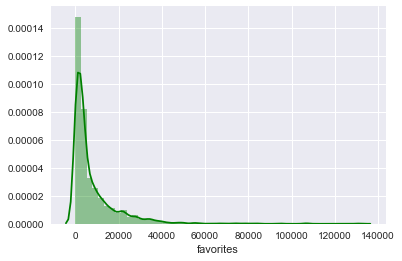

In [151]:
sns.distplot(archive_clean.favorites, color = 'green', label = 'Favorites')

sns.plt.show()

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


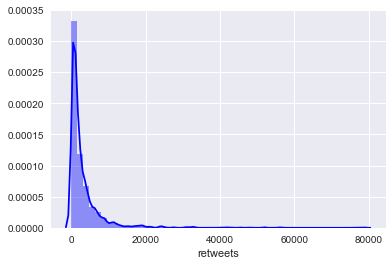

In [152]:
sns.distplot(archive_clean.retweets, color = 'blue', label = 'Retweets')
sns.plt.show()

Trying to log transform the favorites and retweets variables so I can get a normal distribution. I'm adding some artificial jitter by setting the zero values to ones.

In [169]:
favorities_lognormed = archive_clean.favorites[archive_clean.favorites <= 0] = 1
retweets_lognormed = archive_clean.retweets[archive_clean.retweets <= 0] = 1

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user

C:\Users\Nathan\Anaconda\envs\py3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


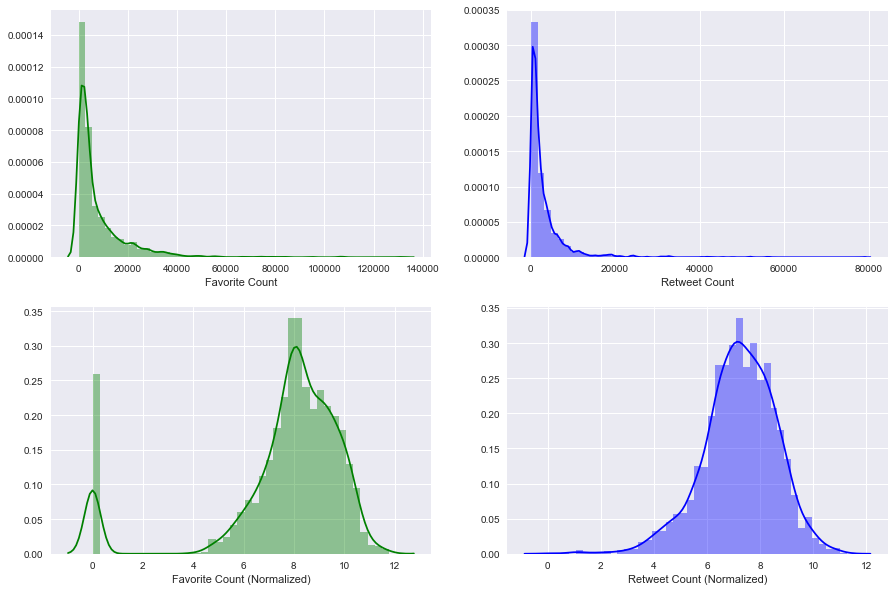

In [202]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(archive_clean.favorites, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(archive_clean.retweets, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(archive_clean.retweets.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

sns.plt.show()
f.savefig('distplots.png')

The original distributions for both favorites and retweets have long positive tails. _Extremely popular tweets are extremely rare._ The normalized graphs (the bottom two) again show similar distributions. They are roughly normal except for the spike in values for the normalized favorite count. That may be due to my jitter work and not an actual attribute of the data. Or there are actually a bunch of tweets with one favorite count.

The two variables seem to have similar distributions implying that the _two measurements are representing similar phenomona_. 

In [189]:
archive_clean.retweets.describe()

count     2356.000000
mean      3125.179966
std       5229.409037
min          1.000000
25%        619.250000
50%       1452.000000
75%       3619.250000
max      78955.000000
Name: retweets, dtype: float64

In [191]:
archive_clean.favorites.describe()

count      2356.000000
mean       8098.820034
std       11972.846772
min           1.000000
25%        1419.000000
50%        3590.000000
75%       10076.750000
max      132094.000000
Name: favorites, dtype: float64

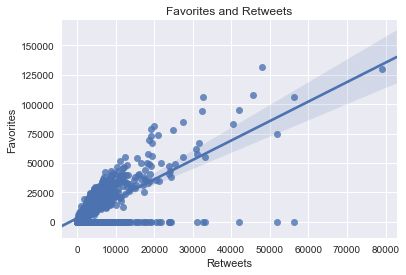

In [205]:
g = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
sns.plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [155]:
archive_clean.corr()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweets,favorites
in_reply_to_status_id,1.000000,0.136589,NaN,NaN,0.265525,-0.109931,-0.213898,0.043424
in_reply_to_user_id,0.136589,1.000000,NaN,NaN,-0.034593,-0.019973,-0.089074,-0.090443
retweeted_status_id,NaN,NaN,1.000000,0.168284,0.171930,-0.037949,-0.077905,0.115189
retweeted_status_user_id,NaN,NaN,0.168284,1.000000,0.016674,-0.009668,-0.112325,-0.021863
rating_numerator,0.265525,-0.034593,0.171930,0.016674,1.000000,0.150388,0.003642,0.005186
rating_denominator,-0.109931,-0.019973,-0.037949,-0.009668,0.150388,1.000000,-0.022426,-0.022875
retweets,-0.213898,-0.089074,-0.077905,-0.112325,0.003642,-0.022426,1.000000,0.723208
favorites,0.043424,-0.090443,0.115189,-0.021863,0.005186,-0.022875,0.723208,1.000000


There is a strong relationship between retweet and favorite counts (0.72). _As a tweet gains Favorites, one can expect to see Retweets to increase and vice versa_. It looks like it may be a nonlinear relationship.

I am curious about the tweets that have many retweets but zero favorites. I wonder if this may be due to added or subtracted features over time. I noticed that my Twitter doesn't have a "Favorite" button any more. It is now called Like. I have not looked to see whether the Favorite data was removed from the JSON data and replaced with Likes.